# CROP YIELD PREDICTION

Agriculture plays a very critical role in the global economy. With the continuing expansion of the human population, understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

The factors affecting crop yield can be combined with Machine Learning to predict the future crop yield. This paper demonstrates our work on building a generalized model for predicting the crop yield. It is a type of regression problem, where the model will be going to predict the crop yield expected in the coming years. Using feature engineering and exploratory data analysis, we will be creating a feature set for determining the most important factors for predicting the crop yield, and consequently creating a highly accurate predictive system using machine learning.


**The following are the necessary tasks that needs to be performed**<br>
**1.Understanding the Data<br>**
**2.Exploratory Data Analysis<br>**
**3.Data Pre-processing<br>**  
            
           .Missing Values 
           .Outlier Detection
           .Feature Reduction
           .Feature Encoding
           .Feature Scaling
           .Feature Engineering
**4.Predictive Modeling<br>**

           .Linear Regression(Ridge) 
           .Neural Network 
           .Random Forest 
           .DecisionTree 
           .Catboost 
           .XGBoost Regressor 
           .XGBoost RF Regressor 
           .Linear Regression(lasso) 
           .Linear Regression 
           .Light Gradient Boosting
           
**5.Fine Tuning**          




# 1. Understanding the Data

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


**Reading the dataset into the Python Environment**

In [3]:
data=pd.read_csv('final.csv')
data.head()

,Domain Code,Domain_x,Area Code,Area,Element Code,Element_x,Item Code,Item_x,Year Code,Year,Unit_x,yield,average_rain_fall_mm_per_year,Domain_y,Element_y,Item_y,Unit_y,pesticides_tonnes,avg_temp
0,QC,Crops,3,Albania,5419,Yield,56,Maize,1990,1990,hg/ha,36613,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
1,QC,Crops,3,Albania,5419,Yield,116,Potatoes,1990,1990,hg/ha,66667,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
2,QC,Crops,3,Albania,5419,Yield,27,"Rice, paddy",1990,1990,hg/ha,23333,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
3,QC,Crops,3,Albania,5419,Yield,83,Sorghum,1990,1990,hg/ha,12500,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
4,QC,Crops,3,Albania,5419,Yield,236,Soybeans,1990,1990,hg/ha,7000,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37


**Insights:**

1.Area:Countries<br>
2.Area Code:Code corresponding to the Countries<br>
3.Year:Year<br>
4.Year Code:Code corresponding to the Year<br>
5.Item:Crop's name<br>
6.Item Code:Code corresponding to the Crop<br>
7.Element_x:Yield<br>
8.Element Code:Yield Code<br>
9.Unit_x:Unit of Yield (hg/ha)<br>
10.Domain_y:Pesticides<br>
11.Element_y:Use<br>
12.Item_y:Pesticides(total)<br>
13.Pesticides:Amount of pesticide used<br>
14:Unit_y:Unit of pesticide used (tonnes of active ingredients)<br>
15.average_rain_fall_mm_per_year:average rain fall per year in milli meter<br>
16.avg_temp:average temperature<br>

   

**Dimension of Dataset**

In [4]:
data.shape

(28242, 19)

**Datatypes & Columns having Null Values**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Domain Code                    28242 non-null  object 
 1   Domain_x                       28242 non-null  object 
 2   Area Code                      28242 non-null  int64  
 3   Area                           28242 non-null  object 
 4   Element Code                   28242 non-null  int64  
 5   Element_x                      28242 non-null  object 
 6   Item Code                      28242 non-null  int64  
 7   Item_x                         28242 non-null  object 
 8   Year Code                      28242 non-null  int64  
 9   Year                           28242 non-null  int64  
 10  Unit_x                         28242 non-null  object 
 11  yield                          28242 non-null  int64  
 12  average_rain_fall_mm_per_year  28242 non-null 

**Insights**<br>
    * Data set contain 28242 rows and 19 columns.<br>
    * Most of the features are of object datatype.<br>
    * Among the 19 features only average_rain_fall_mm_per_year have **null values**.



**Basic details of the data**

In [6]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Domain Code,28242,1,QC,28242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domain_x,28242,1,Crops,28242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Code,28242.0,NaN,NaN,NaN,107.279831,64.984983,1.0,56.0,100.0,157.0,276.0
Area,28242,101,India,4048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Element Code,28242.0,NaN,NaN,NaN,5419.0,0.0,5419.0,5419.0,5419.0,5419.0,5419.0
Element_x,28242,1,Yield,28242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Code,28242.0,NaN,NaN,NaN,102.156929,84.85064,15.0,27.0,83.0,122.0,489.0
Item_x,28242,10,Potatoes,4276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Code,28242.0,NaN,NaN,NaN,2001.544296,7.051905,1990.0,1995.0,2001.0,2008.0,2013.0
Year,28242.0,NaN,NaN,NaN,2001.544296,7.051905,1990.0,1995.0,2001.0,2008.0,2013.0


In [7]:
data.agg({'yield': ['min', 'max']})

,yield
min,50
max,501412


In [8]:
data.agg({'Year': ['min', 'max']})

,Year
min,1990
max,2013


In [9]:
data['Area'].nunique()

101

In [10]:
data['Item_x'].nunique()

10

In [11]:
for col in data.columns:
    print(col, " : ", data[col].unique())

Domain Code  :  ['QC']
Domain_x  :  ['Crops']
Area Code  :  [  3   4   7   9   1  10  11  52  12  13  16  57 255  20  21  27 233  29
  32  33  37  40  44  98  54  56  58  59  60 178  63  67  68  79  81  84
  89  90  91  93  95  97 100 101 103 104 106 109 110 108 114 119 121 122
 124 126 129 130 131 133 136 137 138 273 143 144 147 149 150 156 157 158
 162 165 168 170 173 174 179 183 184 194 195 198 202 203  38 276 207 210
 211 208 216 222 223 226 230 229 234 251 181]
Area  :  ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica

**Insights:**<br>
* The dataset contains information of data from 1990 to 2013.<br>
* The dataset contains information about 101 countries and 10 different crops Items.<br>
* Yield having minimum value 50 and maximum value 501412.<br>


    

# 2. Exploratory Data Analysis

**Univariate Analysis:Distribution of Important Features**

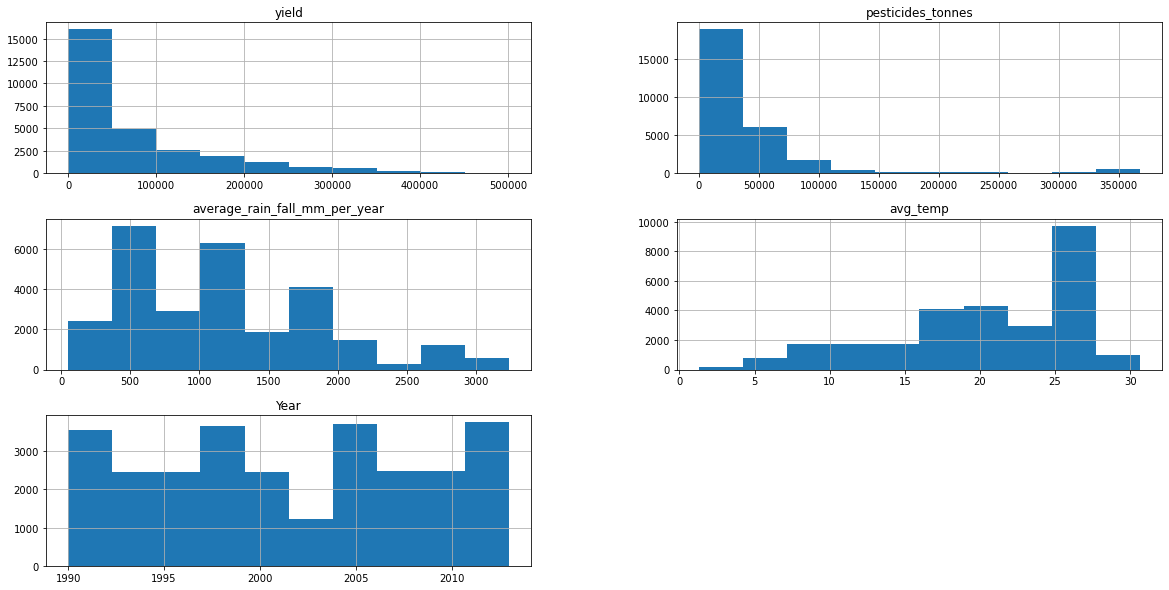

In [12]:
data1 = data[['yield','pesticides_tonnes','average_rain_fall_mm_per_year','avg_temp','Year']]
data1.hist(figsize=(20,10))
# plt.title("Distribution of Important Features",size=18)
plt.show()

**Distribution of Crops**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Maize'),
  Text(1, 0, 'Potatoes'),
  Text(2, 0, 'Rice, paddy'),
  Text(3, 0, 'Sorghum'),
  Text(4, 0, 'Soybeans'),
  Text(5, 0, 'Wheat'),
  Text(6, 0, 'Cassava'),
  Text(7, 0, 'Sweet potatoes'),
  Text(8, 0, 'Plantains and others'),
  Text(9, 0, 'Yams')])

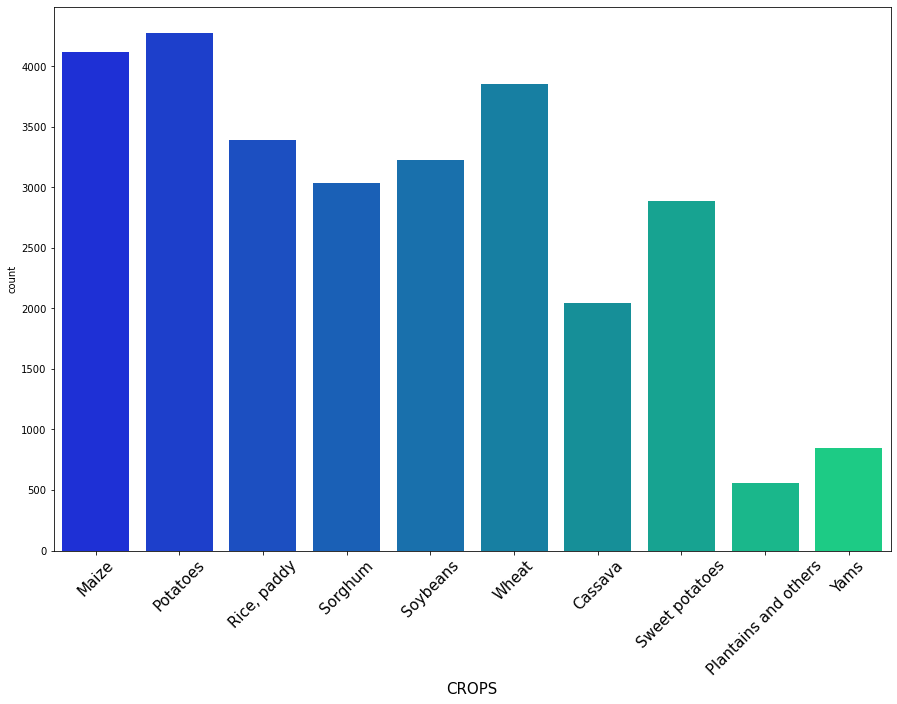

In [13]:
plt.figure(figsize = (15,10))
sns.countplot(data=data,x='Item_x',palette='winter')
plt.xlabel('CROPS',size=15)
plt.xticks(rotation=45,size=15)


**Insights:**<br>
    * From the analysis Highest crop cultivated is **Potatoes** across all countries.<br>
    * And the Lowest crop Cultivated is **Plantains and others** across all countries.<br>

**Top 10 Area wise distribution using pie chart**

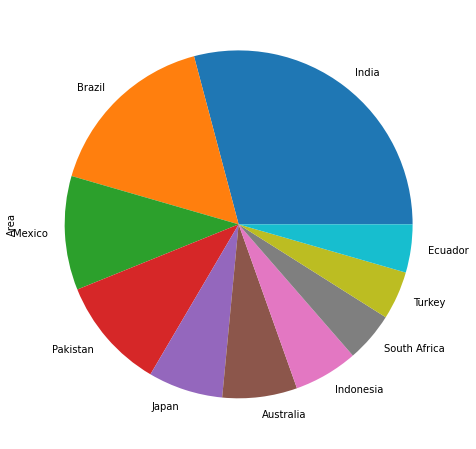

In [14]:
plt.figure(figsize=(15,8))
data['Area'].value_counts()[:10].plot(kind='pie')
plt.show()

**Insights:**<br>
    * From the pie chart we can say that **India** has the highest count in **Area** feature.<br>
    * So we can conclude that **India** producing large variety of crops.

**Bivariate Analysis:**

**Distribution of Crops vs Yield**

<AxesSubplot:xlabel='Item_x', ylabel='yield'>

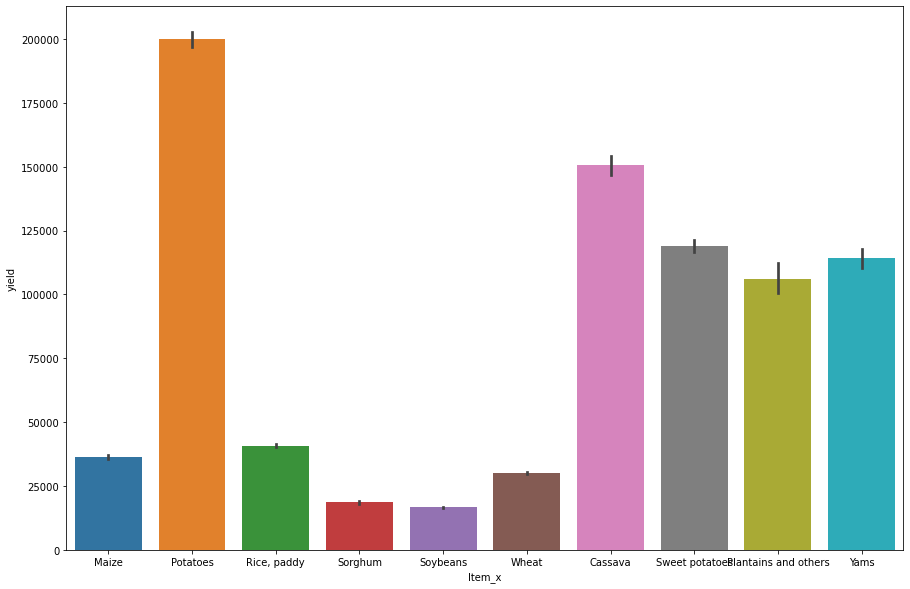

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['Item_x'], y=data['yield'])

**Insights:**<br>
    * **Potatoes** having the highest Yield compared to other crops<br>
    * **Soybeans** have the lowest Yield compared to other crops<br>

**Top 10  countries with highest Yield**

Text(0.5, 0, 'yield')

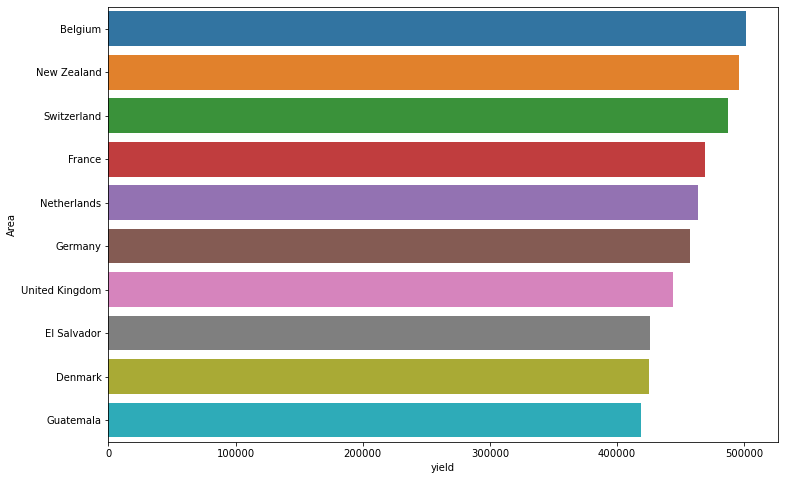

In [16]:
df=data.groupby('Area')['yield'].apply(lambda ser: ser.drop_duplicates().nlargest(1)).droplevel(level=1).sort_index().reset_index()
df1=df.nlargest(10, ['yield'])
plt.figure(figsize = (12,8))
sns.barplot(x=df1['yield'],y=df1['Area'])
plt.xlabel('yield',size=10)

**Insights:**<br>
    * **Belgium** producing crops with highest Yield<br>
    

**Top 5 Countries with highest average_rain_fall_mm_per_year**

Text(0.5, 0, 'average_rain_fall_mm_per_year')

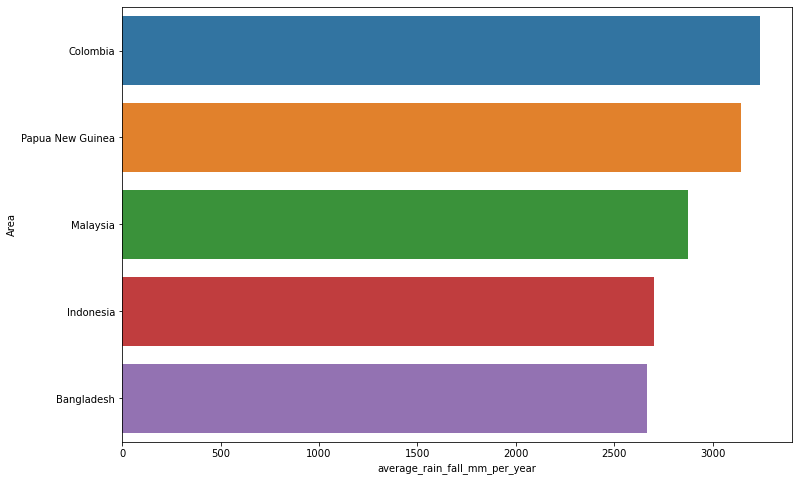

In [17]:
df2=data.groupby('Area')['average_rain_fall_mm_per_year'].apply(lambda ser: ser.drop_duplicates().nlargest(1)).droplevel(level=1).sort_index().reset_index()
df3=df2.nlargest(5, ['average_rain_fall_mm_per_year'])
plt.figure(figsize = (12,8))
# plt.subplot(1, 2, 1)
sns.barplot(x=df3['average_rain_fall_mm_per_year'],y=df3['Area'])
plt.xlabel('average_rain_fall_mm_per_year',size=10)


**Insights:**<br>
    *  **Colombia** having the highest average rain fall per year

**Comparison of yield,avg_temp,pesticides,average_rain_fall_mm_per_year with respect to year**

<AxesSubplot:xlabel='Year', ylabel='average_rain_fall_mm_per_year'>

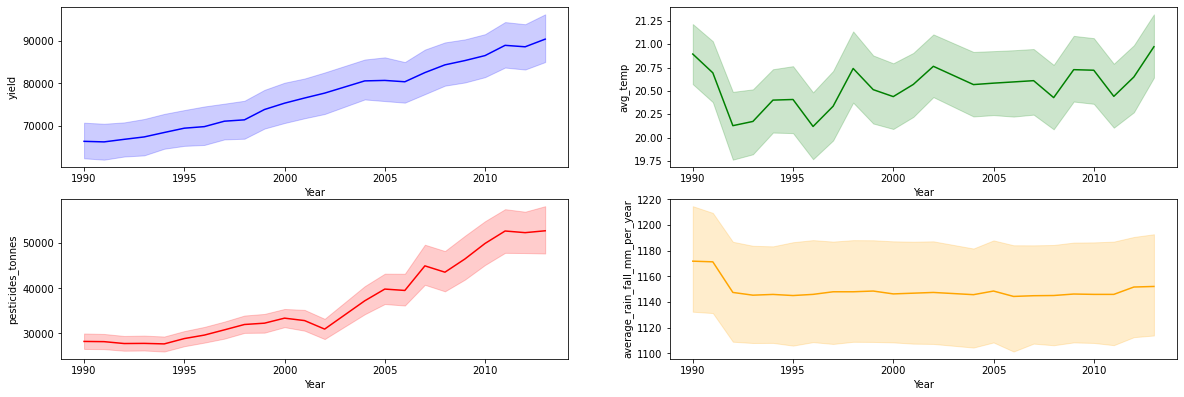

In [18]:
plt.figure(figsize = (20,10))
plt.subplot(3, 2, 1)
sns.lineplot(x = 'Year', y ='yield', data = data, color = 'blue')
plt.subplot(3, 2, 2)
sns.lineplot(x = 'Year', y ='avg_temp', data = data, color = 'green')
plt.subplot(3, 2, 3)
sns.lineplot(x = 'Year', y ='pesticides_tonnes', data = data, color = 'red')
plt.subplot(3, 2, 4)
sns.lineplot(x = 'Year', y ='average_rain_fall_mm_per_year', data = data, color = 'orange')

**Insights:**<br>
    * Yield of the crops and Usage of pesticides are increasing with respect to Year.<br>
    * Yield and pesticides usage  directly proportional to Year.<br>
    * During 1990's average_rain_fall_mm_per_year is slightly high.<br>
    * After 1990's the average_rain_fall_mm_per_year have decreased and  until 2010 average_rain_fall_mm_per_year has remained almost same .<br>
    * After 2010  average_rain_fall_mm_per_year slightly increased<br>
    * Avg_temp is widely varying over the Years.

**Comparison of crops with respect to avg_temp,pesticides,average_rain_fall_mm_per_year**  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Maize'),
  Text(1, 0, 'Potatoes'),
  Text(2, 0, 'Rice, paddy'),
  Text(3, 0, 'Sorghum'),
  Text(4, 0, 'Soybeans'),
  Text(5, 0, 'Wheat'),
  Text(6, 0, 'Cassava'),
  Text(7, 0, 'Sweet potatoes'),
  Text(8, 0, 'Plantains and others'),
  Text(9, 0, 'Yams')])

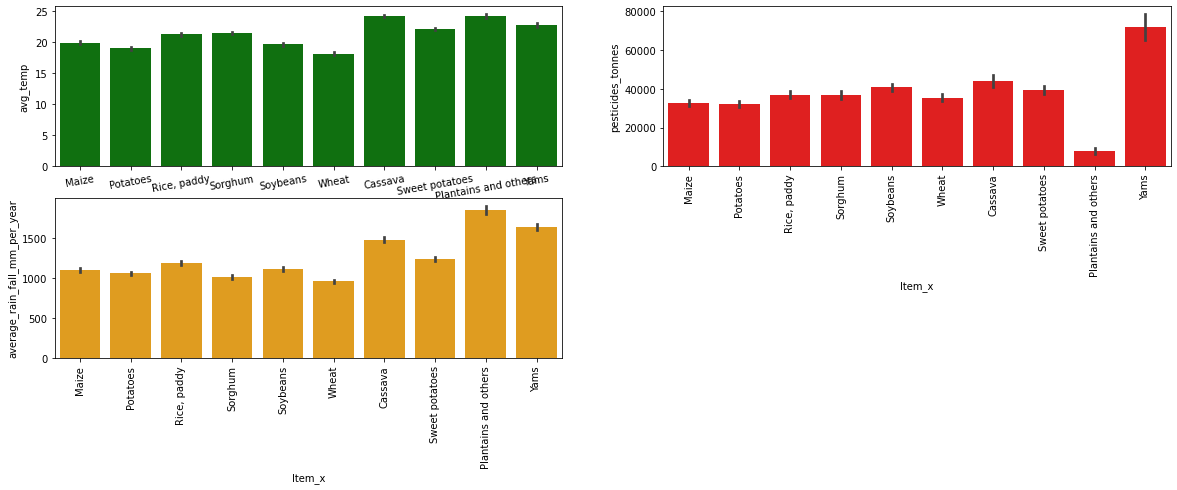

In [19]:
plt.figure(figsize = (20,10))
plt.subplot(3, 2, 1)
sns.barplot(x = 'Item_x', y ='avg_temp', data = data, color = 'green')
plt.xticks(rotation=10)
plt.subplot(3, 2, 2)
sns.barplot(x = 'Item_x', y ='pesticides_tonnes', data = data, color = 'red')
plt.xticks(rotation=90,size=10)
plt.subplot(3, 2, 3)
sns.barplot(x = 'Item_x', y ='average_rain_fall_mm_per_year', data = data, color = 'orange')
plt.xticks(rotation=90,size=10)

**Insights:**<br>
    * **Cassava** and **Plantains and others** are the crops cultivate at high temperature.<br>
    * **Wheat** cultivated at low temperature.<br>
    * Pesticides usage is high for **Yams** and low for **Plantains and others**.<br>
    * **Plantains and others** cultivated at highest rainfall and **Wheat** cultivated at low rainfall.<br>  

# 3. PRE-PROCESSING

## 3.1 Missing Value Handling

In [20]:
#Checking for null values in our dataset
data.isnull().sum() 

Domain Code                      0
Domain_x                         0
Area Code                        0
Area                             0
Element Code                     0
Element_x                        0
Item Code                        0
Item_x                           0
Year Code                        0
Year                             0
Unit_x                           0
yield                            0
average_rain_fall_mm_per_year    0
Domain_y                         0
Element_y                        0
Item_y                           0
Unit_y                           0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

There is no null values in the dataset.

## 3.2 Outlier Detection

We do not check for outliers in categorical variables.

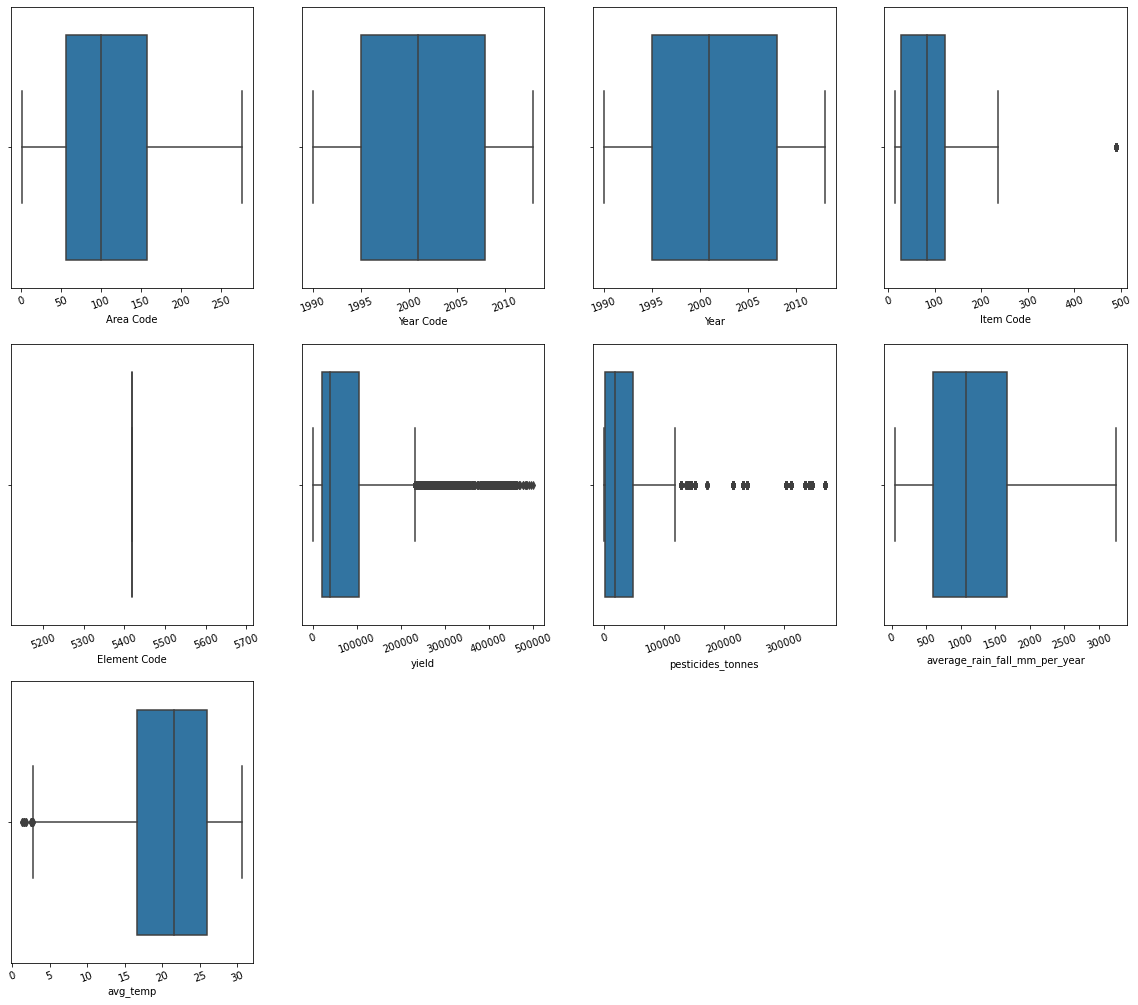

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,30))
features = ['Area Code', 'Year Code', 'Year', 'Item Code', 'Element Code', 'yield','pesticides_tonnes', 'average_rain_fall_mm_per_year', 'avg_temp']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(rotation = 20)

Since these feature values are acceptable to have highly varying values in real case scenarios,
we are not removing or replacing outliers in our dataset.

## 3.3 Feature Reduction

<AxesSubplot:title={'center':'Heatmap of the  Data befor feature reduction'}>

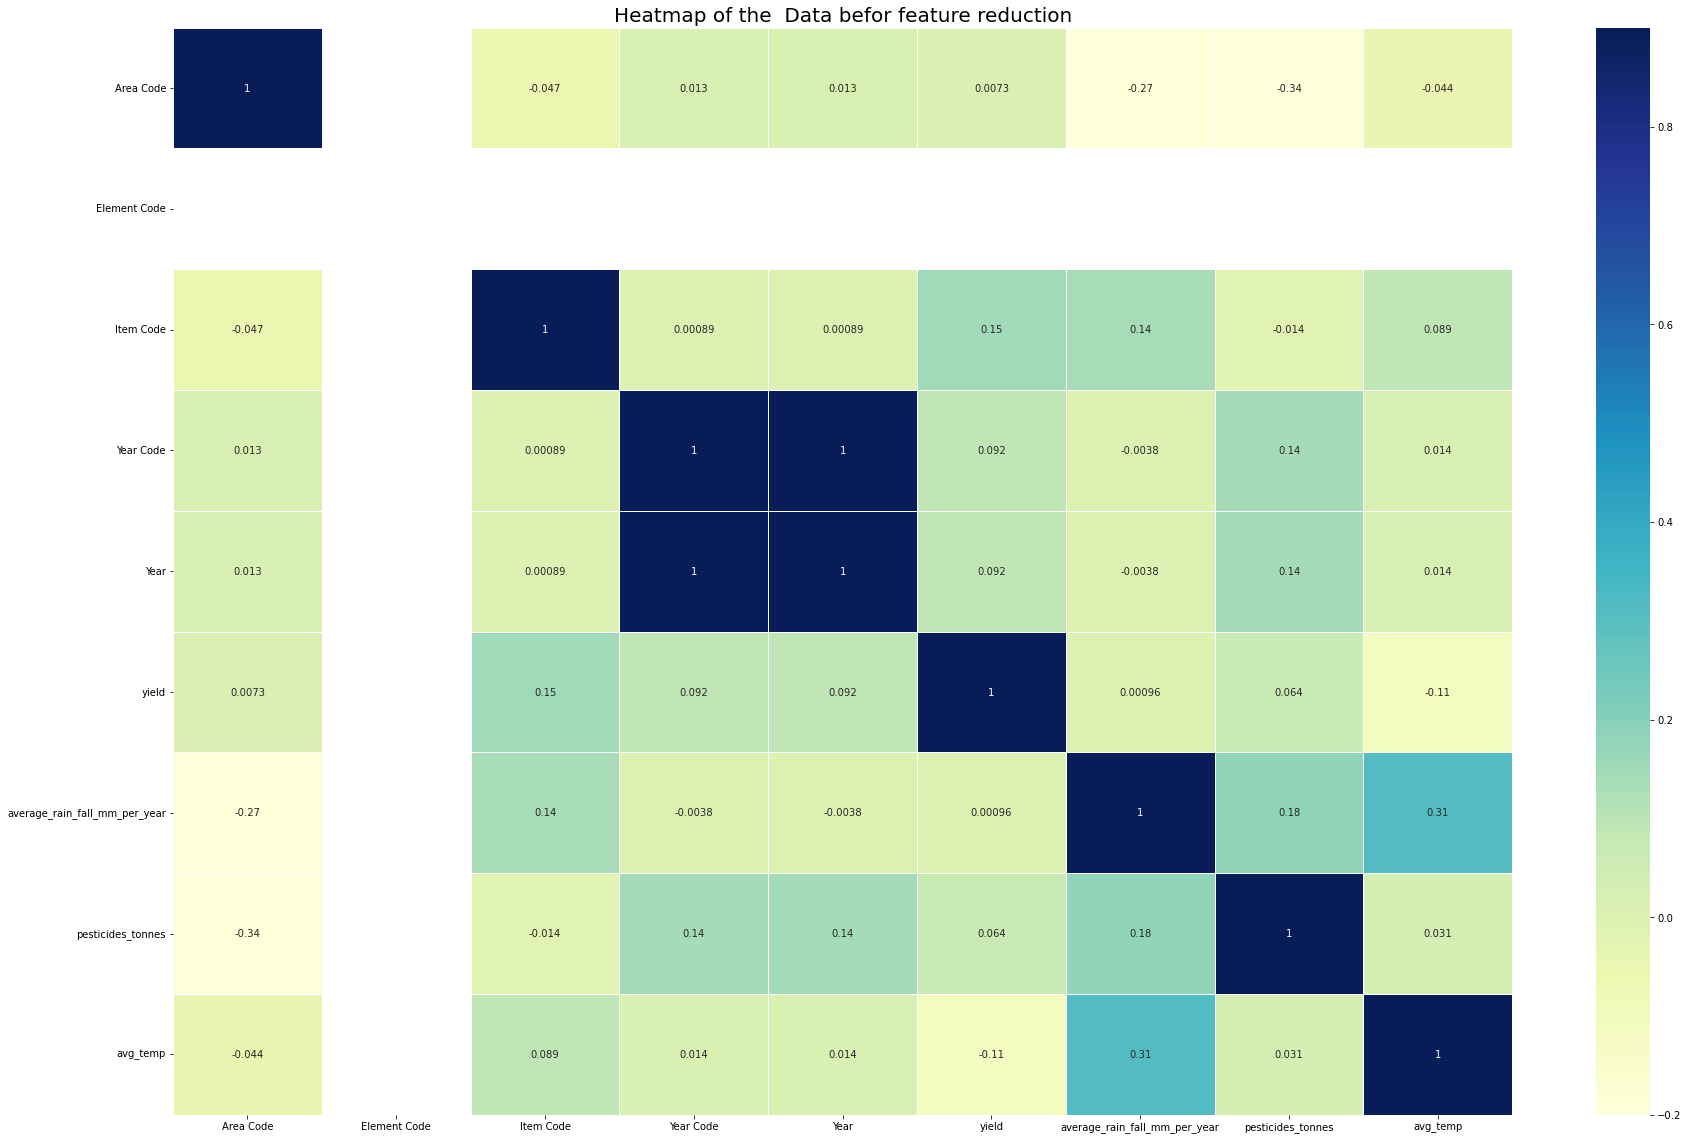

In [22]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = data.corr()
# Creating Heatmap using seaborn & Correlation matrix
plt.figure(figsize=(30,20))
plt.title('Heatmap of the  Data befor feature reduction', fontsize=20)
colormap = sns.color_palette('ch:s=.25,rot=-.25')
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.9, annot=True, linewidth=0.75, cmap="YlGnBu")

**Removing features which are highly correlated**

In [23]:
#Year and Year Code are highly correlated.
#yield is  dependent on Year hence we are removing Year Code.
data=data.drop(['Year Code'],axis=1)
data.head()

,Domain Code,Domain_x,Area Code,Area,Element Code,Element_x,Item Code,Item_x,Year,Unit_x,yield,average_rain_fall_mm_per_year,Domain_y,Element_y,Item_y,Unit_y,pesticides_tonnes,avg_temp
0,QC,Crops,3,Albania,5419,Yield,56,Maize,1990,hg/ha,36613,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
1,QC,Crops,3,Albania,5419,Yield,116,Potatoes,1990,hg/ha,66667,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
2,QC,Crops,3,Albania,5419,Yield,27,"Rice, paddy",1990,hg/ha,23333,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
3,QC,Crops,3,Albania,5419,Yield,83,Sorghum,1990,hg/ha,12500,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
4,QC,Crops,3,Albania,5419,Yield,236,Soybeans,1990,hg/ha,7000,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37


 Year Code removed

<AxesSubplot:title={'center':'Heatmap after Feature Reduction'}>

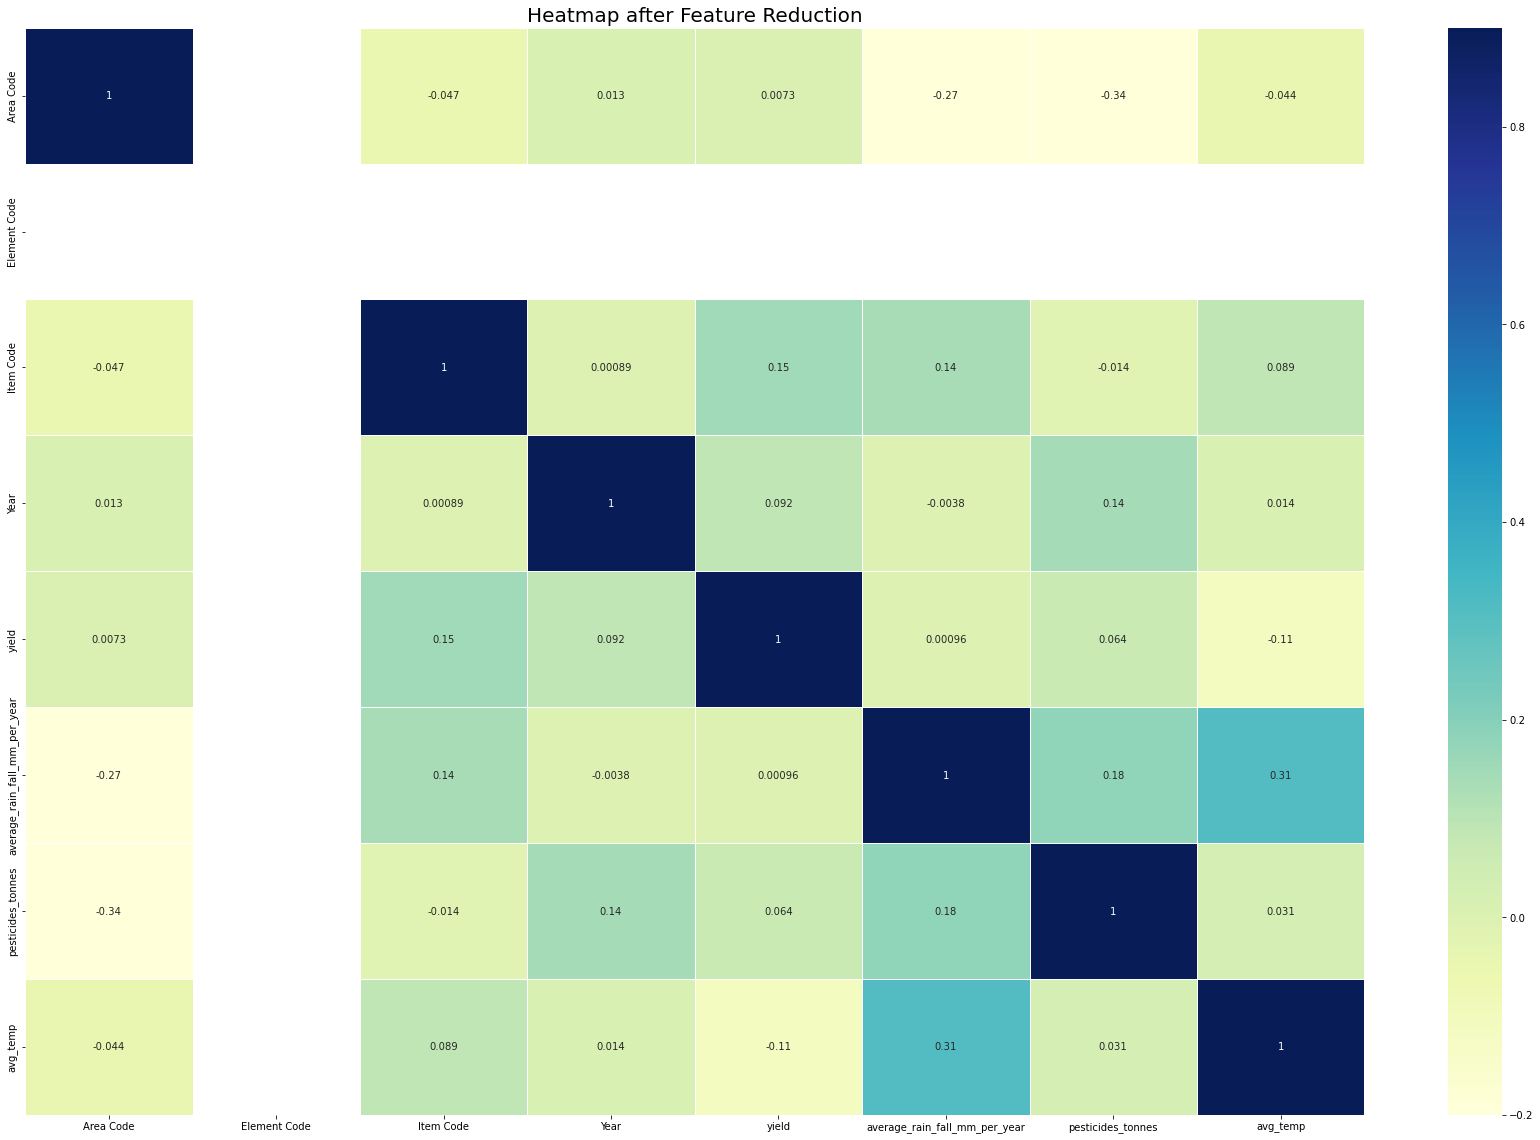

In [24]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = data.corr()
# Creating Heatmap using seaborn & Correlation matrix
plt.figure(figsize=(30,20))
plt.title('Heatmap after Feature Reduction', fontsize=20)
colormap = sns.color_palette('ch:s=.25,rot=-.25')
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.9, annot=True, linewidth=0.75, cmap="YlGnBu")

# 3.4 Feature Encoding

**Getting the list of column names from feature dataframe which is suitable for label encoding**

In [25]:
Agri_data_Cols = []
for i in list(data.columns):
    if data[i].dtype == 'O' and len(data[i].unique()) > 2:
        Agri_data_Cols.append(i)
        
print('The below given list of columns needs a Label Encoding:\n',Agri_data_Cols)

The below given list of columns needs a Label Encoding:
 ['Area', 'Item_x']


**Creating a label encoded dataframe of the targeted columns with the help of LabelEncoder from sklearn.preprocessing**

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in Agri_data_Cols:
    data[i] = labelencoder.fit_transform(data[i])

**Displaying the dataset after removing the original columns in the feature dataframe with encoded columns**

In [27]:
data.head()

,Domain Code,Domain_x,Area Code,Area,Element Code,Element_x,Item Code,Item_x,Year,Unit_x,yield,average_rain_fall_mm_per_year,Domain_y,Element_y,Item_y,Unit_y,pesticides_tonnes,avg_temp
0,QC,Crops,3,0,5419,Yield,56,1,1990,hg/ha,36613,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
1,QC,Crops,3,0,5419,Yield,116,3,1990,hg/ha,66667,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
2,QC,Crops,3,0,5419,Yield,27,4,1990,hg/ha,23333,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
3,QC,Crops,3,0,5419,Yield,83,5,1990,hg/ha,12500,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37
4,QC,Crops,3,0,5419,Yield,236,6,1990,hg/ha,7000,1485.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0,16.37


# 3.5 Feature Scaling

## 3.5.1 Standardization


In [28]:
#Displaying the columns in our dataset
data.columns

Index(['Domain Code', 'Domain_x', 'Area Code', 'Area', 'Element Code',
       'Element_x', 'Item Code', 'Item_x', 'Year', 'Unit_x', 'yield',
       'average_rain_fall_mm_per_year', 'Domain_y', 'Element_y', 'Item_y',
       'Unit_y', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

**Before Scaling**

In [29]:
X1=data.drop(['Domain Code', 'Domain_x',  'Element Code','yield', 'Element_x',
         'Unit_x', 'Item Code','Area Code',
       'Domain_y', 'Element_y', 'Item_y',
       'Unit_y'],axis=1)

In [30]:
X1.head()

,Area,Item_x,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,1485.0,121.0,16.37
1,0,3,1990,1485.0,121.0,16.37
2,0,4,1990,1485.0,121.0,16.37
3,0,5,1990,1485.0,121.0,16.37
4,0,6,1990,1485.0,121.0,16.37


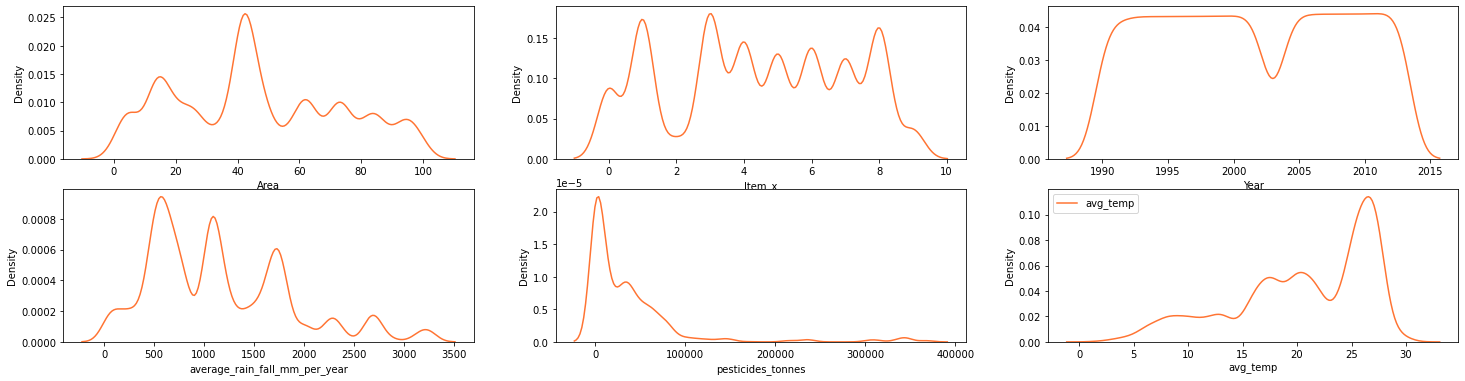

In [31]:
#Analysis Before Scaling
plt.figure(figsize=(25,23))
plt.title('Before Scaling', fontsize=18)
for i in enumerate(X1): 
    ax = plt.subplot(7, 3, i[0]+1)   
    sns.kdeplot(X1[i[1]], color ='#FF7433', label=i[1])
plt.legend(fontsize=10)

In [32]:
#Scaling the split dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Year']
X1[cols]= sc.fit_transform(X1[cols])
X1.head()

,Area,Item_x,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,-1.637075,0.473294,-0.616366,-0.661069
1,0,3,-1.637075,0.473294,-0.616366,-0.661069
2,0,4,-1.637075,0.473294,-0.616366,-0.661069
3,0,5,-1.637075,0.473294,-0.616366,-0.661069
4,0,6,-1.637075,0.473294,-0.616366,-0.661069


In [33]:
#Basic info on the scaled dataset
X1.describe()

,Area,Item_x,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,2.824200e+04,2.824200e+04,2.824200e+04,2.824200e+04
mean,46.494724,4.420898,4.676774e-15,-9.330748e-15,-6.616956e-15,5.646613e-15
std,26.813405,2.635337,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,0.000000,0.000000,-1.637075e+00,-1.546994e+00,-6.183835e-01,-3.048608e+00
25%,24.000000,3.000000,-9.280345e-01,-7.833986e-01,-5.899975e-01,-6.083909e-01
50%,42.000000,4.000000,-7.718558e-02,-9.306286e-02,-3.260209e-01,1.532609e-01
75%,68.000000,7.000000,9.154715e-01,7.311134e-01,1.936526e-01,8.646112e-01
max,100.000000,9.000000,1.624512e+00,2.945823e+00,5.515571e+00,1.601310e+00


**After Scaling**

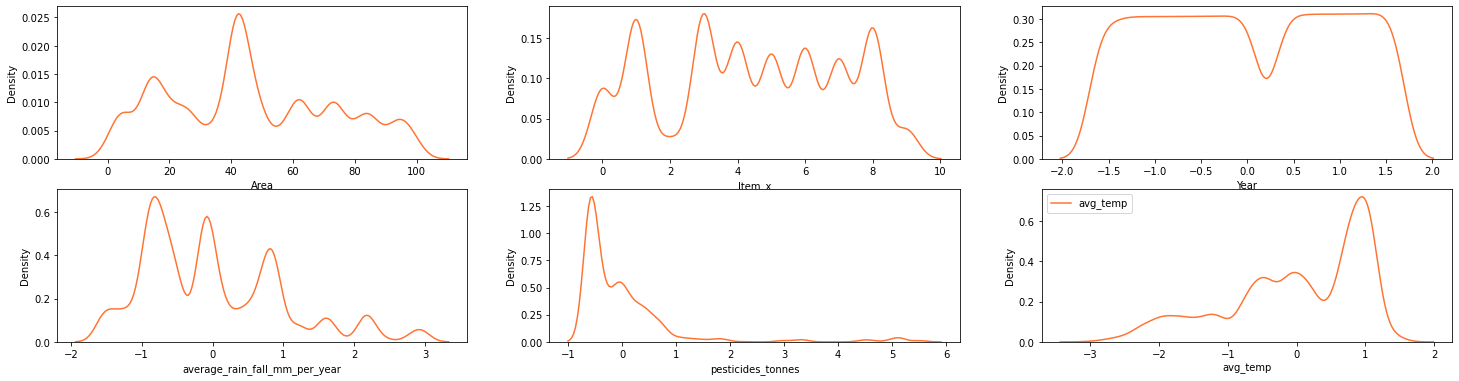

In [34]:
#Analysis After Scaling
plt.figure(figsize=(25,23))
plt.title('After Scaling', fontsize=18)
for i in enumerate(X1): 
        ax = plt.subplot(7, 3, i[0]+1)   
        sns.kdeplot(X1[i[1]], color ='#FF7433', label=i[1])
plt.legend(fontsize=10)


# 3.6 Feature Engineering

**Selecting the most relevant features used for predictive modeling**

In [35]:
y = data['yield']

In [36]:
X=X1.copy()
X.head()

,Area,Item_x,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,-1.637075,0.473294,-0.616366,-0.661069
1,0,3,-1.637075,0.473294,-0.616366,-0.661069
2,0,4,-1.637075,0.473294,-0.616366,-0.661069
3,0,5,-1.637075,0.473294,-0.616366,-0.661069
4,0,6,-1.637075,0.473294,-0.616366,-0.661069


In [37]:
X

,Area,Item_x,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,-1.637075,0.473294,-0.616366,-0.661069
1,0,3,-1.637075,0.473294,-0.616366,-0.661069
2,0,4,-1.637075,0.473294,-0.616366,-0.661069
3,0,5,-1.637075,0.473294,-0.616366,-0.661069
4,0,6,-1.637075,0.473294,-0.616366,-0.661069
...,...,...,...,...,...,...
28237,100,4,1.624512,-0.693232,-0.575853,-0.123991
28238,100,5,1.624512,-0.693232,-0.575853,-0.123991
28239,100,6,1.624512,-0.693232,-0.575853,-0.123991
28240,100,7,1.624512,-0.693232,-0.575853,-0.123991


In [38]:
y.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: yield, dtype: int64

# 4. Model Building

In [42]:
#Model Building

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

import time

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

**Importing train_test_split from the sklearn.model_selection library and splitting the data, by keeping 80% of the data in train dataset and the rest 20% in test dataset**

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y,test_size = 0.2, random_state=42)

**Training the models and displaying their training time of each model**

In [44]:
models = {
    'Linear Regression(Ridge)' : Ridge(),
    '          Neural Network' : MLPRegressor(),
    '           Random Forest' : RandomForestRegressor(),
    '            DecisionTree' : DecisionTreeRegressor(),
    '                Catboost' : CatBoostRegressor(verbose=0),
    '       XGBoost Regressor' : XGBRegressor(),
    '    XGBoost RF Regressor' : XGBRFRegressor(),
    'Linear Regression(lasso)' : Lasso(),
    '       Linear Regression' : LinearRegression(),
    ' Light Gradient Boosting' : LGBMRegressor()
}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(name + ' trained.')
    print(name +'Training Time:', round(end_time-start_time,2))

Linear Regression(Ridge) trained.
Linear Regression(Ridge)Training Time: 0.01
          Neural Network trained.
          Neural NetworkTraining Time: 16.5
           Random Forest trained.
           Random ForestTraining Time: 6.79
            DecisionTree trained.
            DecisionTreeTraining Time: 0.09
                Catboost trained.
                CatboostTraining Time: 5.76
       XGBoost Regressor trained.
       XGBoost RegressorTraining Time: 1.33
    XGBoost RF Regressor trained.
    XGBoost RF RegressorTraining Time: 1.05
Linear Regression(lasso) trained.
Linear Regression(lasso)Training Time: 0.0
       Linear Regression trained.
       Linear RegressionTraining Time: 0.01
 Light Gradient Boosting trained.
 Light Gradient BoostingTraining Time: 0.23


**Displaing the testing time of each models**

In [45]:
for name, model in models.items():
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    print(name + 'Testing Time:', round(end_time-start_time,2))

Linear Regression(Ridge)Testing Time: 0.0
          Neural NetworkTesting Time: 0.01
           Random ForestTesting Time: 0.16
            DecisionTreeTesting Time: 0.0
                CatboostTesting Time: 0.02
       XGBoost RegressorTesting Time: 0.02
    XGBoost RF RegressorTesting Time: 0.01
Linear Regression(lasso)Testing Time: 0.0
       Linear RegressionTesting Time: 0.0
 Light Gradient BoostingTesting Time: 0.01


**Checking the accuracy of each model based on RMSE and R^2 value of the models**

In [46]:
#To calculate RMSE and R^2 value
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_test-y_pred)**2))
    return rmse

def get_r2(y_true,y_pred):
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    return r2

In [47]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression(Ridge) RMSE: 81501.77
          Neural Network RMSE: 88733.82
           Random Forest RMSE: 10050.65
            DecisionTree RMSE: 12940.54
                Catboost RMSE: 14731.67
       XGBoost Regressor RMSE: 13909.30
    XGBoost RF Regressor RMSE: 31890.22
Linear Regression(lasso) RMSE: 81501.77
       Linear Regression RMSE: 81501.76
 Light Gradient Boosting RMSE: 17428.40


In [48]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + ' R^2: {:.5f}'.format(r2))

Linear Regression(Ridge) R^2: 0.08425
          Neural Network R^2: -0.08548
           Random Forest R^2: 0.98607
            DecisionTree R^2: 0.97691
                Catboost R^2: 0.97008
       XGBoost Regressor R^2: 0.97333
    XGBoost RF Regressor R^2: 0.85980
Linear Regression(lasso) R^2: 0.08425
       Linear Regression R^2: 0.08425
 Light Gradient Boosting R^2: 0.95812


Criteria for selecting the best model is low RMSE value and high R^2 value.
Here Random Forest having the lowest **RMSE (10226.52)** value and highest **R^2 (0.98558)** value.Hence we are taking Random Forest Regressor Algorithm for predicting the model.

In [49]:
#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
y_pred = reg_rf.predict(X_test)

In [51]:
reg_rf.score(X_train, y_train)

0.9980201041606535

In [52]:
reg_rf.score(X_test, y_test)

0.9860557612488462

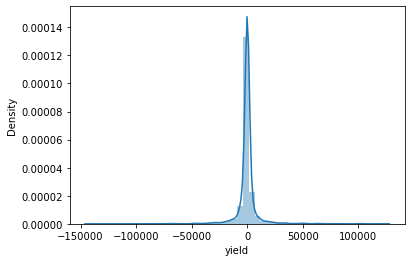

In [53]:
sns.distplot(y_test-y_pred)
plt.show()

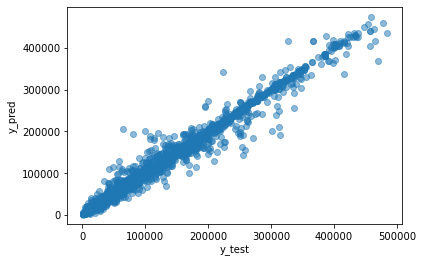

In [54]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [55]:
#Calcuting MAE,MSE,RMSE and R^2 Values.
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3723.559996459551
MSE: 101146933.78429802
RMSE: 10057.183193334902


In [56]:
metrics.r2_score(y_test, y_pred)

0.9860557612488462

**Based on the RMSE,R^2 value we are considering RandomForestRegressor Model for fine tuning.**

# 5.Hyperparameter Tuning

**5.1.RandomizedSearchCV**

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

In [59]:
# Creating a random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [60]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2,random_state=42)

In [79]:
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=230, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1136; total time=  10.1s
[CV] END max_depth=230, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1136; total time=  10.8s
[CV] END max_depth=230, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1136; total time=  11.1s
[CV] END max_depth=230, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1136; total time=  10.7s
[CV] END max_depth=230, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=1136; total time=  10.9s
[CV] END max_depth=670, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=963; total time=  11.8s
[CV] END max_depth=670, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=963; total time=  12.1s
[CV] END max_depth=670, max_features=sqrt, min_samples_leaf=1, min_samples_split

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1654; total time=  13.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1654; total time=  12.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1654; total time=  12.6s
[CV] END max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=963; total time=   7.1s
[CV] END max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=963; total time=   7.1s
[CV] END max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=963; total time=   7.1s
[CV] END max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=963; total time=   7.1s
[CV] END max_depth=560, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=963; total time=   7.1s
[CV] END max_depth=

[CV] END max_depth=1000, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1481; total time=  11.8s
[CV] END max_depth=1000, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1481; total time=  11.5s
[CV] END max_depth=1000, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1481; total time=  11.3s
[CV] END max_depth=1000, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1481; total time=  11.2s
[CV] END max_depth=1000, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=1481; total time=  11.3s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=272; total time=   6.5s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=272; total time=   6.6s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=272; total time=   6.5s
[CV] END max

[CV] END max_depth=450, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=445; total time=   4.3s
[CV] END max_depth=450, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=445; total time=   4.3s
[CV] END max_depth=450, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=445; total time=   4.3s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.9s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.9s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.9s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.9s
[CV] END max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, m

[CV] END max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=1481; total time=  36.2s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=1481; total time=  36.0s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=1481; total time=  36.4s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=1481; total time=  36.7s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=1481; total time=  36.4s
[CV] END max_depth=780, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=272; total time=   2.6s
[CV] END max_depth=780, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=272; total time=   2.6s
[CV] END max_depth=780, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=272; total time=   2.6s
[CV] END max_depth=

[CV] END max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=272; total time=   6.9s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=272; total time=   6.9s
[CV] END max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=272; total time=   6.9s
[CV] END max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=  47.2s
[CV] END max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=  46.9s
[CV] END max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=  46.9s
[CV] END max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=  46.8s
[CV] END max_depth=230, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=  46.8s
[CV] END max_depth=10, max_

[CV] END max_depth=780, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=790; total time=  20.7s
[CV] END max_depth=780, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=790; total time=  20.6s
[CV] END max_depth=780, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=790; total time=  20.6s
[CV] END max_depth=780, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=790; total time=  20.6s
[CV] END max_depth=780, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=790; total time=  20.5s
[CV] END max_depth=780, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=272; total time=   7.7s
[CV] END max_depth=780, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=272; total time=   7.7s
[CV] END max_depth=780, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=272; total time=   7.7s
[CV] END max_depth=780, max

[CV] END max_depth=120, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=445; total time=   8.5s
[CV] END max_depth=120, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=445; total time=   8.5s
[CV] END max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=2000; total time=  20.0s
[CV] END max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=2000; total time=  19.9s
[CV] END max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=2000; total time=  20.0s
[CV] END max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=2000; total time=  19.9s
[CV] END max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=2000; total time=  20.4s
[CV] END max_depth=230, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1481; total time=  17.9s
[CV] END max_depth=230

In [81]:
#Random forest Regression using the best parameters from random search cv
rf = RandomForestRegressor()
rf_random =RandomForestRegressor(n_estimators= 272,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth=780,bootstrap=False)

In [82]:
rf_random.fit(X_train,y_train)
prediction = rf_random.predict(X_test)

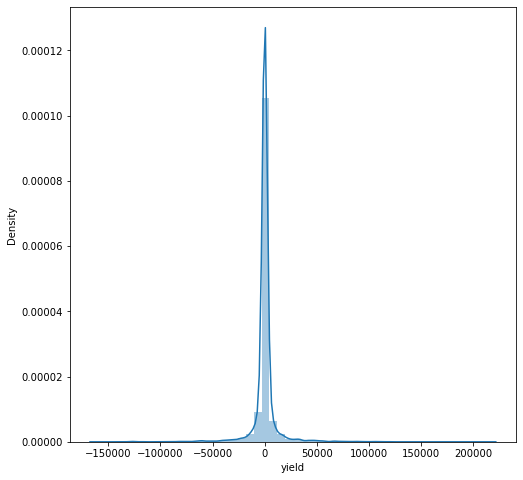

In [83]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

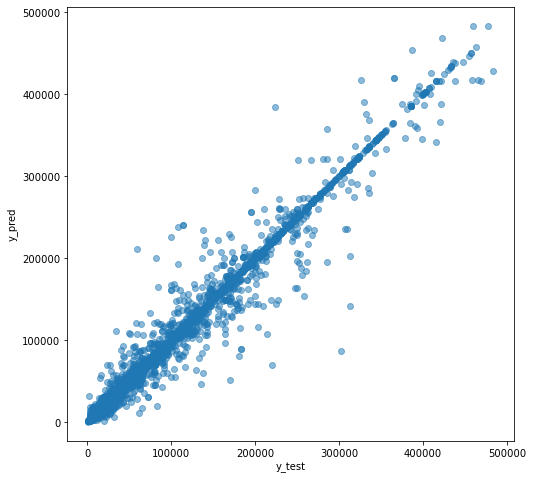

In [84]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [85]:
#Calcuting MAE,MSE,RMSE and R^2 Values.
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4095.664300563783
MSE: 162993009.62774158
RMSE: 12766.871567762464


In [86]:
metrics.r2_score(y_test,prediction )

0.9775295863553782

 **5.2 GridSearch CV**

**GridSearch CV using the best parameters from Random search CV**

In [87]:
#Selecting from Random search CV
rf_random.best_params_={'n_estimators': 272,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 780}

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = {
   'max_depth': [rf_random.best_params_['max_depth']],
   'max_features': [rf_random.best_params_['max_features']],
   'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'], 
                        rf_random.best_params_['min_samples_leaf']+2, 
                        rf_random.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_random.best_params_['min_samples_split'] - 2,
                         rf_random.best_params_['min_samples_split'] - 1,
                         rf_random.best_params_['min_samples_split'], 
                         rf_random.best_params_['min_samples_split'] +1,
                         rf_random.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_random.best_params_['n_estimators'] - 200, rf_random.best_params_['n_estimators'] - 100, 
                    rf_random.best_params_['n_estimators'], 
                    rf_random.best_params_['n_estimators'] + 100, rf_random.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'max_depth': [780], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [72, 172, 272, 372, 472]}


In [92]:
#Fiting the grid_search to the data
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [780], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [72, 172, 272, 372, 472]},
             verbose=2)

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=780, min_samples_split=3, n_estimators=272)

In [94]:
best_grid=grid_search.best_estimator_

In [95]:
best_grid

RandomForestRegressor(max_depth=780, min_samples_split=3, n_estimators=272)

In [96]:
#Random forest Regression using the best parameters from grid search cv
rf_grid =RandomForestRegressor(n_estimators= 272,min_samples_split=3,min_samples_leaf=1,max_features='auto',max_depth=780,bootstrap=False)

In [97]:
rf_grid.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=780, min_samples_split=3,
                      n_estimators=272)

In [99]:
y_pred=rf_grid.predict(X_test)

In [100]:
# Calculating MAE,MSE,RMSE and R^2 values
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 3969.5990671826353
MSE: 165593668.33443508
RMSE: 12868.320338507085


In [101]:
metrics.r2_score(y_test,y_pred)

0.9771710563974288

### After the final analysis it is observed that we are getting better results on our model without hyperparameter tuning.Hence we are selecting the model without tuning.